
# Set 1: Exploratory Data Analysis (EDA)

This notebook performs robust EDA on the **Set 1** schema (2017–2024) and generates at least **12 visuals**.
It uses **pandas** and **matplotlib** only (no seaborn), and each plot is rendered in a **single figure**.

## How to use
1. Put your Set 1 CSV on disk.
2. Update `CSV_PATH` below to point at your file.
3. Run the notebook top-to-bottom. Any missing columns are handled gracefully (plots will be skipped with a note).

## Visual Index (aiming for 12+)
1. Record count per year (bar)
2. Mean `DiffMeanHourlyPercent` per year (line)
3. Distribution of `DiffMeanHourlyPercent` for latest available year (hist)
4. Boxplot of `DiffMedianHourlyPercent` by year (boxplot)
5. Mean `DiffMeanBonusPercent` per year (line)
6. Distribution of `DiffMeanBonusPercent` for latest available year (hist)
7. Employer size distribution for latest year (bar)
8. Late submission rate per year (bar)
9. Scatter: `DiffMeanHourlyPercent` vs `DiffMedianHourlyPercent` (latest year)
10. Female top quartile share (avg) over time (line)
11. Bonus eligibility: Male vs Female % over time (line)
12. Correlation matrix of numeric fields (latest year) (imshow)

> Tip: You can tweak `YEARS = list(range(2017, 2025))` if the dataset changes.


In [1]:
import pandas as pd
from IPython.display import display

# Update the path if your CSV lives elsewhere
CSV_PATH = "GPG_2017_2024_cleaned_v2.csv"

# Read the CSV
df = pd.read_csv(CSV_PATH, low_memory=False)

# Basic info
print(f"Loaded CSV with shape: {df.shape}\n")
print("First 3 columns and their dtypes:")
print(df.dtypes.head(3))

# Optional: nicer on-screen display
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

# Preview a few rows
print("\nPreview (first 20 rows):")
display(df.head(20))


Loaded CSV with shape: (15203, 209)

First 3 columns and their dtypes:
EmployerId                    int64
2017_Address                 object
2017_CompanyLinkToGPGInfo    object
dtype: object

Preview (first 20 rows):


,EmployerId,2017_Address,2017_CompanyLinkToGPGInfo,2017_CompanyNumber,2017_CurrentName,2017_DateSubmitted,2017_DiffMeanBonusPercent,2017_DiffMeanHourlyPercent,2017_DiffMedianBonusPercent,2017_DiffMedianHourlyPercent,2017_DueDate,2017_EmployerName,2017_EmployerSize,2017_FemaleBonusPercent,2017_FemaleLowerMiddleQuartile,2017_FemaleLowerQuartile,2017_FemaleTopQuartile,2017_FemaleUpperMiddleQuartile,2017_MaleBonusPercent,2017_MaleLowerMiddleQuartile,2017_MaleLowerQuartile,2017_MaleTopQuartile,2017_MaleUpperMiddleQuartile,2017_PostCode,2017_ResponsiblePerson,2017_SicCodes,2017_SubmittedAfterTheDeadline,2018_Address,2018_CompanyLinkToGPGInfo,2018_CompanyNumber,2018_CurrentName,2018_DateSubmitted,2018_DiffMeanBonusPercent,2018_DiffMeanHourlyPercent,2018_DiffMedianBonusPercent,2018_DiffMedianHourlyPercent,2018_DueDate,2018_EmployerName,2018_EmployerSize,2018_FemaleBonusPercent,2018_FemaleLowerMiddleQuartile,2018_FemaleLowerQuartile,2018_FemaleTopQuartile,2018_FemaleUpperMiddleQuartile,2018_MaleBonusPercent,2018_MaleLowerMiddleQuartile,2018_MaleLowerQuartile,2018_MaleTopQuartile,2018_MaleUpperMiddleQuartile,2018_PostCode,2018_ResponsiblePerson,2018_SicCodes,2018_SubmittedAfterTheDeadline,2019_Address,2019_CompanyLinkToGPGInfo,2019_CompanyNumber,2019_CurrentName,2019_DateSubmitted,2019_DiffMeanBonusPercent,2019_DiffMeanHourlyPercent,...,2022_MaleLowerMiddleQuartile,2022_MaleLowerQuartile,2022_MaleTopQuartile,2022_MaleUpperMiddleQuartile,2022_PostCode,2022_ResponsiblePerson,2022_SicCodes,2022_SubmittedAfterTheDeadline,2023_Address,2023_CompanyLinkToGPGInfo,2023_CompanyNumber,2023_CurrentName,2023_DateSubmitted,2023_DiffMeanBonusPercent,2023_DiffMeanHourlyPercent,2023_DiffMedianBonusPercent,2023_DiffMedianHourlyPercent,2023_DueDate,2023_EmployerName,2023_EmployerSize,2023_FemaleBonusPercent,2023_FemaleLowerMiddleQuartile,2023_FemaleLowerQuartile,2023_FemaleTopQuartile,2023_FemaleUpperMiddleQuartile,2023_MaleBonusPercent,2023_MaleLowerMiddleQuartile,2023_MaleLowerQuartile,2023_MaleTopQuartile,2023_MaleUpperMiddleQuartile,2023_PostCode,2023_ResponsiblePerson,2023_SicCodes,2023_SubmittedAfterTheDeadline,2024_Address,2024_CompanyLinkToGPGInfo,2024_CompanyNumber,2024_CurrentName,2024_DateSubmitted,2024_DiffMeanBonusPercent,2024_DiffMeanHourlyPercent,2024_DiffMedianBonusPercent,2024_DiffMedianHourlyPercent,2024_DueDate,2024_EmployerName,2024_EmployerSize,2024_FemaleBonusPercent,2024_FemaleLowerMiddleQuartile,2024_FemaleLowerQuartile,2024_FemaleTopQuartile,2024_FemaleUpperMiddleQuartile,2024_MaleBonusPercent,2024_MaleLowerMiddleQuartile,2024_MaleLowerQuartile,2024_MaleTopQuartile,2024_MaleUpperMiddleQuartile,2024_PostCode,2024_ResponsiblePerson,2024_SicCodes,2024_SubmittedAfterTheDeadline
0,9373,"Open International Limited, Buckholt Drive, Wa...",https://cdn.prod.website-files.com/67a48187af5...,01519547,OPEN G I LIMITED,2025-05-27 08:03:16,-2.1,6.0,4.1,1.5,2018-04-05,OPEN G I LIMITED,250 to 499,83.1,29.0,38.0,29.0,35.5,83.5,71.0,62.0,71.0,64.5,WR4 9SR,Chris Guillaume (Group Chief Executive Officer),62012,False,"Open International Limited, Buckholt Drive, Wa...",https://cdn.prod.website-files.com/67a48187af5...,01519547,OPEN G I LIMITED,2025-05-20 12:28:55,49.0,12.0,-2.7,4.4,2019-04-05,OPEN G I LIMITED,250 to 499,75.4,34.3,23.1,35.2,29.6,70.1,65.7,76.9,64.8,70.4,WR4 9SR,Chris Guillaume (Group Chief Executive Officer),62012,False,"Open International Limited, Buckholt Drive, Wa...",https://cdn.prod.website-files.com/67a48187af5...,01519547,OPEN G I LIMITED,2025-05-20 12:27:58,9.3,10.6,...,61.00,63.00,77.00,67.50,WR4 9SR,Simon Badley (Group Chief Executive Officer),62012,False,"Open International Limited, Buckholt Drive, Wa...",https://cdn.prod.website-files.com/67a48187af5...,01519547,OPEN G I LIMITED,2025-05-20 12:22:53,43.70,14.37,16.56,13.55,2024-04-05,OPEN G I LIMITED,250 to 499,87.07,28.09,40.45,23.86,32.58,78.80,71.91,59.55,76.14,67.42,WR4 9SR,Simon Badley (Group CEO),62012,False,"Open International Limited, Buckholt Drive, Wa...",https://cd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the years to analyze
YEARS = list(range(2017, 2025))

# Load data
try:
    df = pd.read_csv(CSV_PATH, low_memory=False)
    print(f"Loaded CSV with shape: {df.shape}")
except FileNotFoundError:
    raise SystemExit(f"Could not find file at {CSV_PATH}. Please set CSV_PATH to your Set 1 CSV.")

# Helper: check columns exist
def has_cols(cols):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        print(f"[SKIP] Missing columns: {missing[:5]}{'...' if len(missing) > 5 else ''}")
        return False
    return True

# Helper: get a mapping year -> column name for a metric like 'DiffMeanHourlyPercent'
def per_year_columns(base_name):
    mapping = {}
    for y in YEARS:
        col = f"{y}_{base_name}"
        if col in df.columns:
            mapping[y] = col
    return mapping

# Helper: return a Series of values for a per-year metric, dropping NaNs
def series_for_year(metric_name, year):
    col = f"{year}_{metric_name}"
    if col in df.columns:
        return df[col].dropna()
    return pd.Series(dtype=float)

# Find "latest available year" by checking which year has the most non-null values for a key metric
key_metric = "DiffMeanHourlyPercent"
availability = {y: df[f"{y}_{key_metric}"].notna().sum() for y in YEARS if f"{y}_{key_metric}" in df.columns}
latest_year = max(availability, key=availability.get) if availability else YEARS[-1]
print(f"Latest year detected for key metric ({key_metric}): {latest_year}")

Loaded CSV with shape: (15203, 209)
Latest year detected for key metric (DiffMeanHourlyPercent): 2024


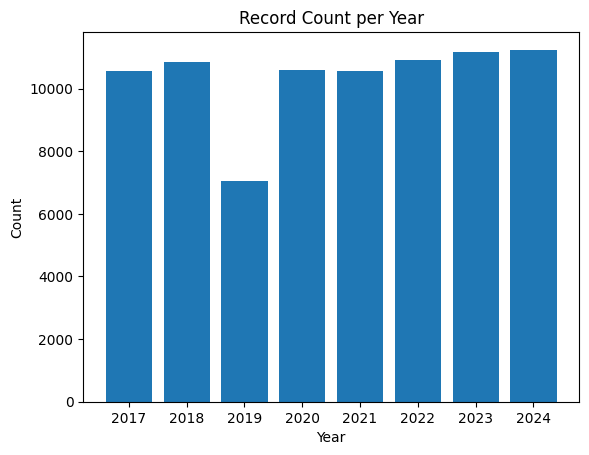

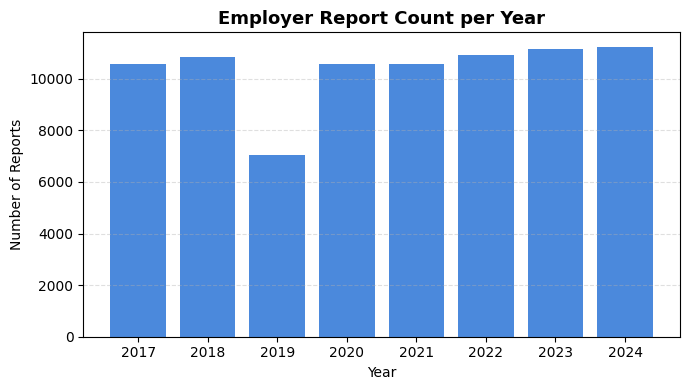

In [3]:

# 1) Record count per year
counts = []
for y in YEARS:
    # Use EmployerName as presence proxy
    col = f"{y}_EmployerName"
    counts.append((y, df[col].notna().sum() if col in df.columns else 0))
counts_df = pd.DataFrame(counts, columns=["Year", "Count"])

plt.figure()
plt.bar(counts_df["Year"].astype(str), counts_df["Count"])
plt.title("Record Count per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

counts_df

plt.figure(figsize=(7,4))
plt.bar(counts_df["Year"].astype(str), counts_df["Count"], color="#4B89DC")
plt.title("Employer Report Count per Year", fontsize=13, weight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



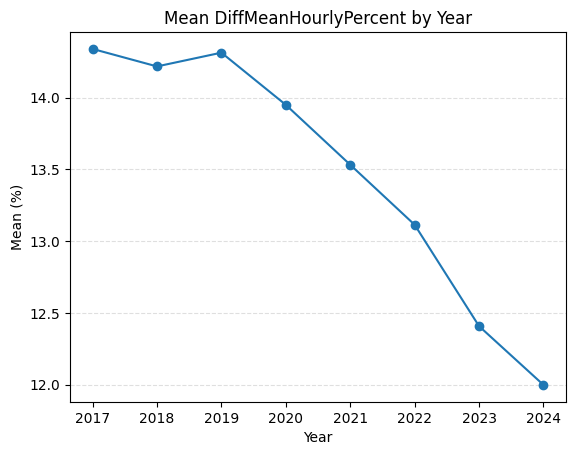

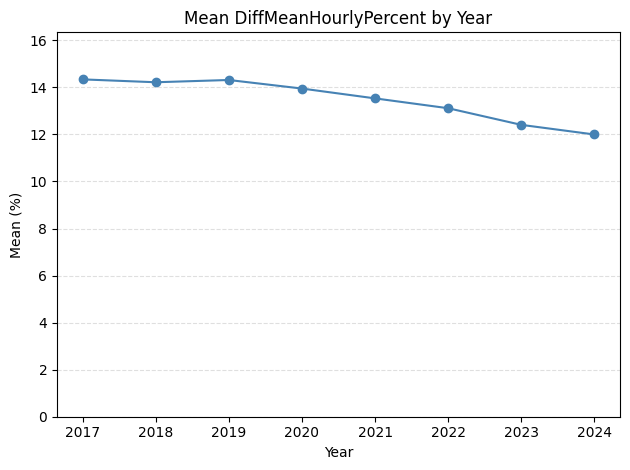

In [4]:

# 2) Mean DiffMeanHourlyPercent per year
metric = "DiffMeanHourlyPercent"
means = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        means.append((y, pd.to_numeric(df[col], errors="coerce").dropna().mean()))
    else:
        means.append((y, np.nan))
means_df = pd.DataFrame(means, columns=["Year", "Mean"])

plt.figure()
plt.plot(means_df["Year"], means_df["Mean"], marker="o")
plt.title("Mean DiffMeanHourlyPercent by Year")
plt.xlabel("Year")
plt.ylabel("Mean (%)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

means_df

plt.figure()
plt.plot(means_df["Year"], means_df["Mean"], marker="o", color="steelblue")
plt.title("Mean DiffMeanHourlyPercent by Year")
plt.xlabel("Year")
plt.ylabel("Mean (%)")

# Key fix: y-axis starts at 0 to avoid exaggeration
plt.ylim(0, max(means_df["Mean"]) + 2)  # ensures it starts from 0, adds small buffer on top

#for cleaner visuals
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



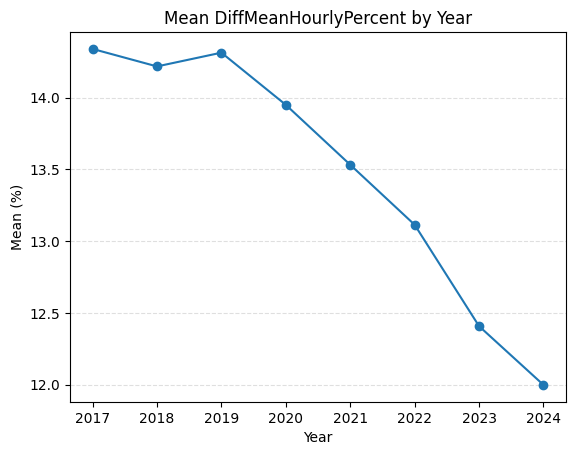

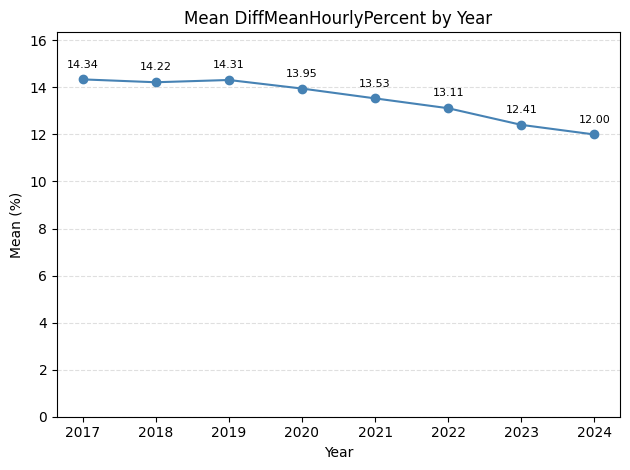

In [20]:
# 2) Mean DiffMeanHourlyPercent per year
metric = "DiffMeanHourlyPercent"
means = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        means.append((y, pd.to_numeric(df[col], errors="coerce").dropna().mean()))
    else:
        means.append((y, np.nan))

means_df = pd.DataFrame(means, columns=["Year", "Mean"])

# --- First plot (optional preview) ---
plt.figure()
plt.plot(means_df["Year"], means_df["Mean"], marker="o")
plt.title("Mean DiffMeanHourlyPercent by Year")
plt.xlabel("Year")
plt.ylabel("Mean (%)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

means_df

# --- Final plot with labels ---
plt.figure()
plt.plot(means_df["Year"], means_df["Mean"], marker="o", color="steelblue")
plt.title("Mean DiffMeanHourlyPercent by Year")
plt.xlabel("Year")
plt.ylabel("Mean (%)")

# Key fix: y-axis starts at 0 to avoid exaggeration
plt.ylim(0, max(means_df["Mean"]) + 2)

# Add labels on each point
for x, y in zip(means_df["Year"], means_df["Mean"]):
    plt.text(
        x,
        y + 0.5,          # vertical offset so label is slightly above the dot
        f"{y:.2f}",       # value rounded to 2 decimals
        ha="center",
        fontsize=8
    )

# Clean visuals
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2834556216.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Value", data=df_long, palette="Blues", showfliers=True)
/tmp/ipython-input-2834556216.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Value_clipped", data=df_long, palette="Greens", showfliers=False)


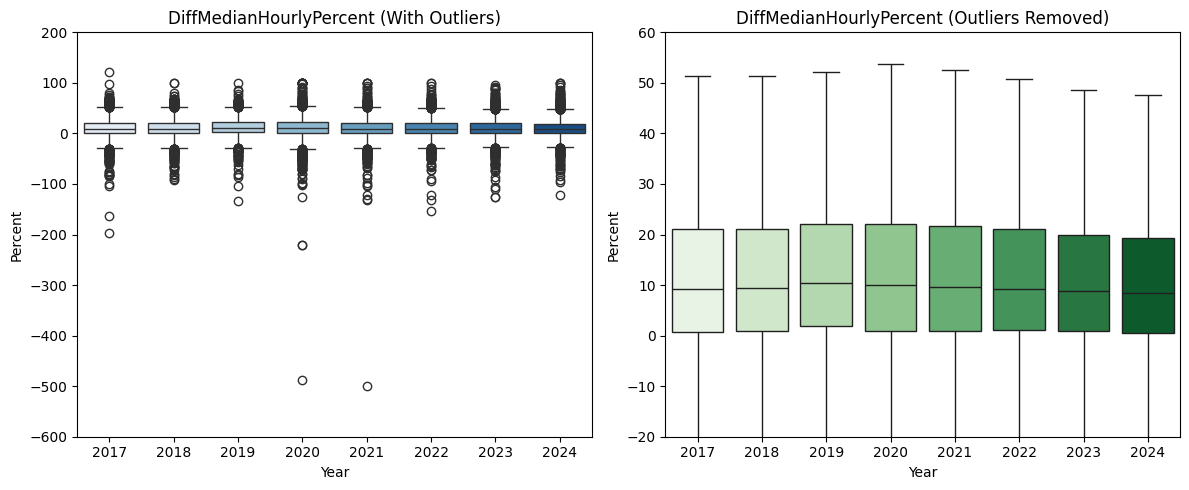

In [5]:
# 3) Boxplots for DiffMedianHourlyPercent – Raw vs. Cleaned
import seaborn as sns
import matplotlib.pyplot as plt

metric = "DiffMedianHourlyPercent"

# Prepare data in long format
df_long = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        s = pd.to_numeric(df[col], errors="coerce")
        df_long.append(pd.DataFrame({"Year": y, "Value": s}))
df_long = pd.concat(df_long, ignore_index=True)

# Create cleaned version by clipping implausible values
df_long["Value_clipped"] = df_long["Value"].clip(-100, 100)  # keeps realistic pay gaps

# Plot side-by-side boxplots
plt.figure(figsize=(12,5))

# Left: Raw data
plt.subplot(1, 2, 1)
sns.boxplot(x="Year", y="Value", data=df_long, palette="Blues", showfliers=True)
plt.title("DiffMedianHourlyPercent (With Outliers)")
plt.ylabel("Percent")
plt.xlabel("Year")
plt.ylim(-600, 200)  # to show full range

# Right: Cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(x="Year", y="Value_clipped", data=df_long, palette="Greens", showfliers=False)
plt.title("DiffMedianHourlyPercent (Outliers Removed)")
plt.ylabel("Percent")
plt.xlabel("Year")
plt.ylim(-20, 60)  # realistic range for visualization

plt.tight_layout()
plt.show()


/tmp/ipython-input-1180761221.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showmeans=True)


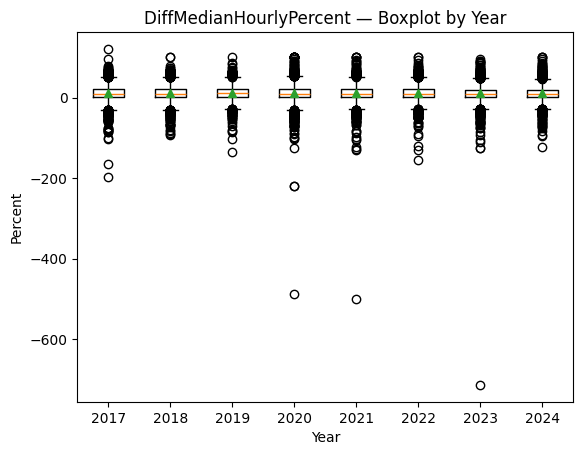

In [6]:

# 4) Boxplot: DiffMedianHourlyPercent by Year
metric = "DiffMedianHourlyPercent"
data = []
labels = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        ser = pd.to_numeric(df[col], errors="coerce").dropna()
        if len(ser) > 0:
            data.append(ser)
            labels.append(str(y))

if data:
    plt.figure()
    plt.boxplot(data, labels=labels, showmeans=True)
    plt.title("DiffMedianHourlyPercent — Boxplot by Year")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.show()
else:
    print("[SKIP] No data for DiffMedianHourlyPercent boxplot.")


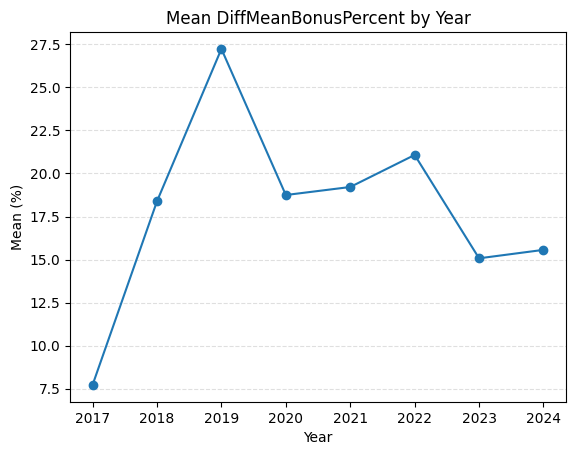

,Year,Mean
0,2017,7.717907
1,2018,18.383938
2,2019,27.234656
3,2020,18.748463
4,2021,19.214538
5,2022,21.075923
6,2023,15.072347
7,2024,15.563157


In [7]:

# 5) Mean DiffMeanBonusPercent per year
metric = "DiffMeanBonusPercent"
means = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        means.append((y, pd.to_numeric(df[col], errors="coerce").dropna().mean()))
    else:
        means.append((y, np.nan))
means_df2 = pd.DataFrame(means, columns=["Year", "Mean"])

plt.figure()
plt.plot(means_df2["Year"], means_df2["Mean"], marker="o")
plt.title("Mean DiffMeanBonusPercent by Year")
plt.xlabel("Year")
plt.ylabel("Mean (%)")
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.show()

means_df2


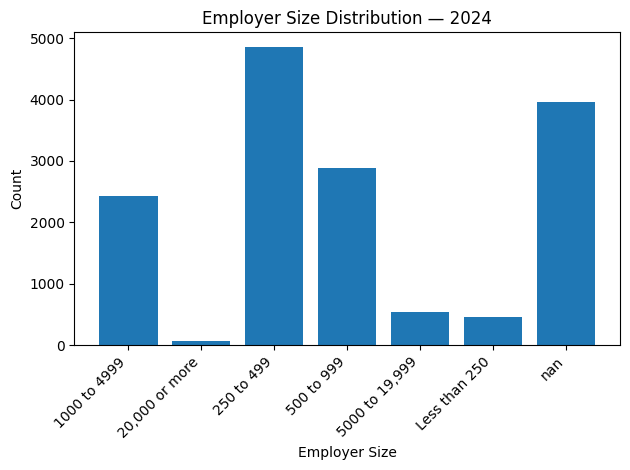

In [8]:

# 7) Employer size distribution — latest year
col = f"{latest_year}_EmployerSize"
if col in df.columns:
    size_counts = df[col].value_counts(dropna=False).sort_index()
    plt.figure()
    plt.bar(size_counts.index.astype(str), size_counts.values)
    plt.title(f"Employer Size Distribution — {latest_year}")
    plt.xlabel("Employer Size")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print(f"[SKIP] {col} not in columns.")


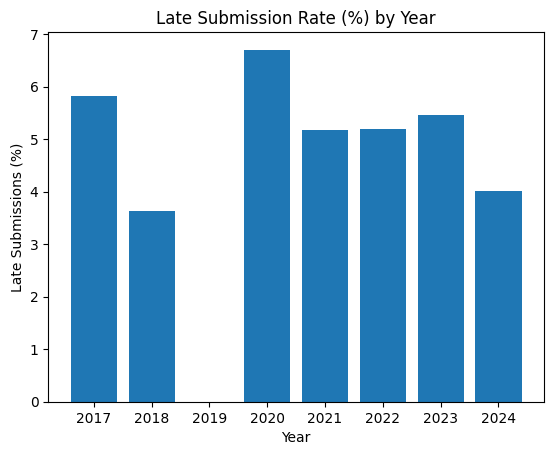

,Year,LateRatePercent
0,2017,5.814642
1,2018,3.637440
2,2019,0.000000
3,2020,6.702624
4,2021,5.170032
5,2022,5.196343
6,2023,5.452871
7,2024,4.018944


In [9]:

# 8) Late submission rate per year
rates = []
metric = "SubmittedAfterTheDeadline"
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        ser = df[col].astype(str).str.lower()
        late = ser.isin(["true", "1", "yes", "y"]).sum()
        total = ser.notna().sum()
        rate = (late / total) * 100 if total > 0 else np.nan
        rates.append((y, rate))
    else:
        rates.append((y, np.nan))

rates_df = pd.DataFrame(rates, columns=["Year", "LateRatePercent"])

plt.figure()
plt.bar(rates_df["Year"].astype(str), rates_df["LateRatePercent"])
plt.title("Late Submission Rate (%) by Year")
plt.xlabel("Year")
plt.ylabel("Late Submissions (%)")
plt.show()

rates_df


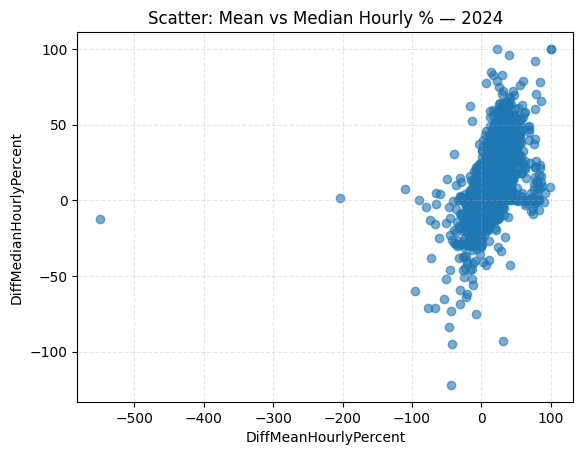

In [10]:

# 9) Scatter: DiffMeanHourlyPercent vs DiffMedianHourlyPercent — latest year
xcol = f"{latest_year}_DiffMeanHourlyPercent"
ycol = f"{latest_year}_DiffMedianHourlyPercent"
if xcol in df.columns and ycol in df.columns:
    x = pd.to_numeric(df[xcol], errors="coerce")
    y = pd.to_numeric(df[ycol], errors="coerce")
    m = x.notna() & y.notna()
    plt.figure()
    plt.scatter(x[m], y[m], alpha=0.6)
    plt.title(f"Scatter: Mean vs Median Hourly % — {latest_year}")
    plt.xlabel("DiffMeanHourlyPercent")
    plt.ylabel("DiffMedianHourlyPercent")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.show()
else:
    print(f"[SKIP] Missing {xcol} or {ycol}.")


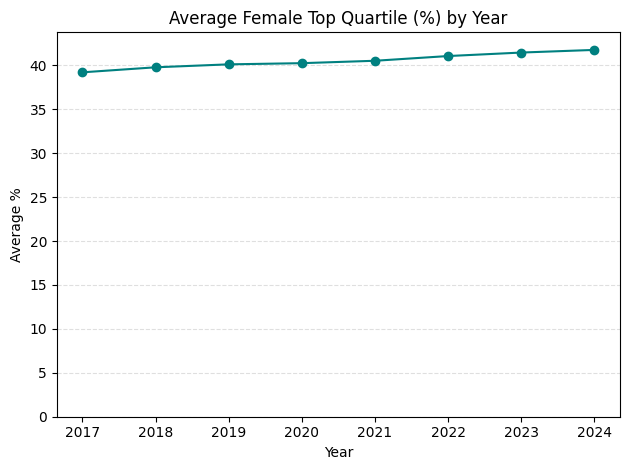

In [11]:

# 10) Female Top Quartile — average share over time
metric = "FemaleTopQuartile"
vals = []
for y in YEARS:
    col = f"{y}_{metric}"
    if col in df.columns:
        v = pd.to_numeric(df[col], errors="coerce").dropna().mean()
        vals.append((y, v))
    else:
        vals.append((y, np.nan))
ftq_df = pd.DataFrame(vals, columns=["Year", "AvgFemaleTopQuartile"])

plt.figure()
plt.plot(ftq_df["Year"], ftq_df["AvgFemaleTopQuartile"], marker="o", color="teal")
plt.title("Average Female Top Quartile (%) by Year")
plt.xlabel("Year")
plt.ylabel("Average %")

# Key fix: start y-axis at 0 for honest visual scale
plt.ylim(0, max(ftq_df["AvgFemaleTopQuartile"]) + 2)

plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



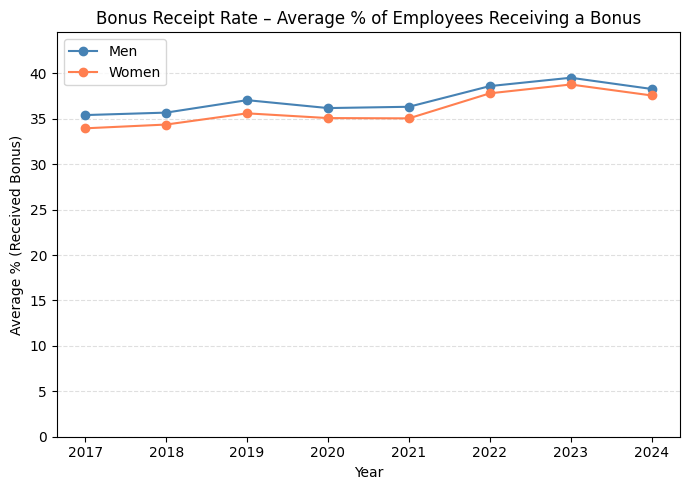

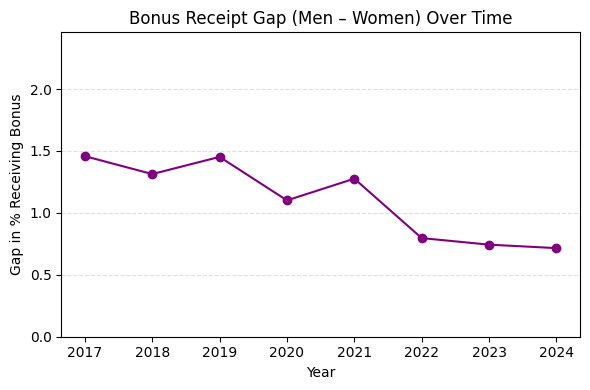

In [12]:
# 11) Bonus Receipt Rate – Male vs Female (avg % of employees receiving a bonus)
male_vals, female_vals = [], []
for y in YEARS:
    mcol = f"{y}_MaleBonusPercent"
    fcol = f"{y}_FemaleBonusPercent"
    m_avg = pd.to_numeric(df[mcol], errors="coerce").dropna().mean() if mcol in df.columns else np.nan
    f_avg = pd.to_numeric(df[fcol], errors="coerce").dropna().mean() if fcol in df.columns else np.nan
    male_vals.append((y, m_avg))
    female_vals.append((y, f_avg))

male_df = pd.DataFrame(male_vals, columns=["Year", "MaleAvg"])
female_df = pd.DataFrame(female_vals, columns=["Year", "FemaleAvg"])

plt.figure(figsize=(7,5))
plt.plot(male_df["Year"], male_df["MaleAvg"], marker="o", label="Men", color="steelblue")
plt.plot(female_df["Year"], female_df["FemaleAvg"], marker="o", label="Women", color="coral")

plt.title("Bonus Receipt Rate – Average % of Employees Receiving a Bonus")
plt.xlabel("Year")
plt.ylabel("Average % (Received Bonus)")
plt.ylim(0, max(male_df["MaleAvg"].max(), female_df["FemaleAvg"].max()) + 5)
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

pd.concat([male_df.set_index("Year"), female_df.set_index("Year")], axis=1)
bonus_gap = male_df["MaleAvg"] - female_df["FemaleAvg"]
plt.figure(figsize=(6,4))
plt.plot(male_df["Year"], bonus_gap, marker="o", color="purple")
plt.title("Bonus Receipt Gap (Men – Women) Over Time")
plt.xlabel("Year")
plt.ylabel("Gap in % Receiving Bonus")
plt.ylim(0, max(bonus_gap)+1)
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()



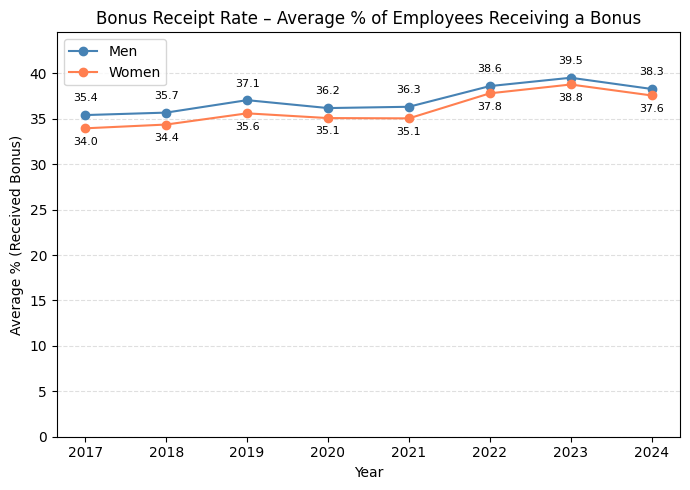

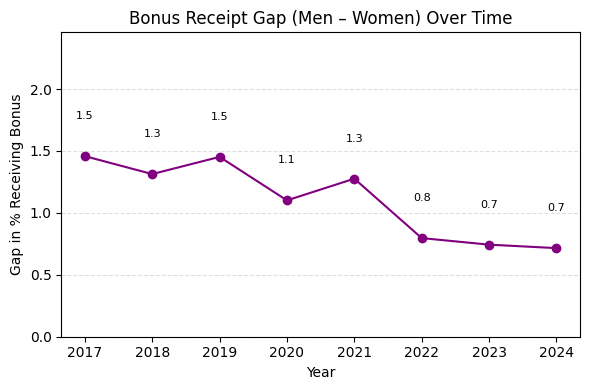

In [24]:
# 11) Bonus Receipt Rate – Male vs Female (avg % of employees receiving a bonus)
male_vals, female_vals = [], []
for y in YEARS:
    mcol = f"{y}_MaleBonusPercent"
    fcol = f"{y}_FemaleBonusPercent"
    m_avg = pd.to_numeric(df[mcol], errors="coerce").dropna().mean() if mcol in df.columns else np.nan
    f_avg = pd.to_numeric(df[fcol], errors="coerce").dropna().mean() if fcol in df.columns else np.nan
    male_vals.append((y, m_avg))
    female_vals.append((y, f_avg))

male_df = pd.DataFrame(male_vals, columns=["Year", "MaleAvg"])
female_df = pd.DataFrame(female_vals, columns=["Year", "FemaleAvg"])

# Plot Men vs Women Bonus Percent
plt.figure(figsize=(7,5))
plt.plot(male_df["Year"], male_df["MaleAvg"], marker="o", label="Men", color="steelblue")
plt.plot(female_df["Year"], female_df["FemaleAvg"], marker="o", label="Women", color="coral")

plt.title("Bonus Receipt Rate – Average % of Employees Receiving a Bonus")
plt.xlabel("Year")
plt.ylabel("Average % (Received Bonus)")

plt.ylim(0, max(male_df["MaleAvg"].max(), female_df["FemaleAvg"].max()) + 5)
plt.grid(True, axis="y", linestyle="--", alpha=0.4)
plt.legend()

# Add labels on every point
# Male labels ABOVE the blue line
for x, y in zip(male_df["Year"], male_df["MaleAvg"]):
    plt.text(
        x,
        y + 1.5,            # above point
        f"{y:.1f}",
        ha="center",
        fontsize=8,
        color="black"
    )

# Female labels BELOW the orange line
for x, y in zip(female_df["Year"], female_df["FemaleAvg"]):
    plt.text(
        x,
        y - 1.8,            # below point
        f"{y:.1f}",
        ha="center",
        fontsize=8,
        color="black"
    )

plt.tight_layout()
plt.show()

# Bonus Gap (Men – Women)
bonus_gap = male_df["MaleAvg"] - female_df["FemaleAvg"]

plt.figure(figsize=(6,4))
plt.plot(male_df["Year"], bonus_gap, marker="o", color="purple")
plt.title("Bonus Receipt Gap (Men – Women) Over Time")
plt.xlabel("Year")
plt.ylabel("Gap in % Receiving Bonus")

plt.ylim(0, max(bonus_gap) + 1)
plt.grid(True, axis="y", linestyle="--", alpha=0.4)

# Labels for bonus gap points
for x, y in zip(male_df["Year"], bonus_gap):
    plt.text(
        x,
        y + 0.3,
        f"{y:.1f}",
        ha="center",
        fontsize=8,
        color="black"
    )

plt.tight_layout()
plt.show()


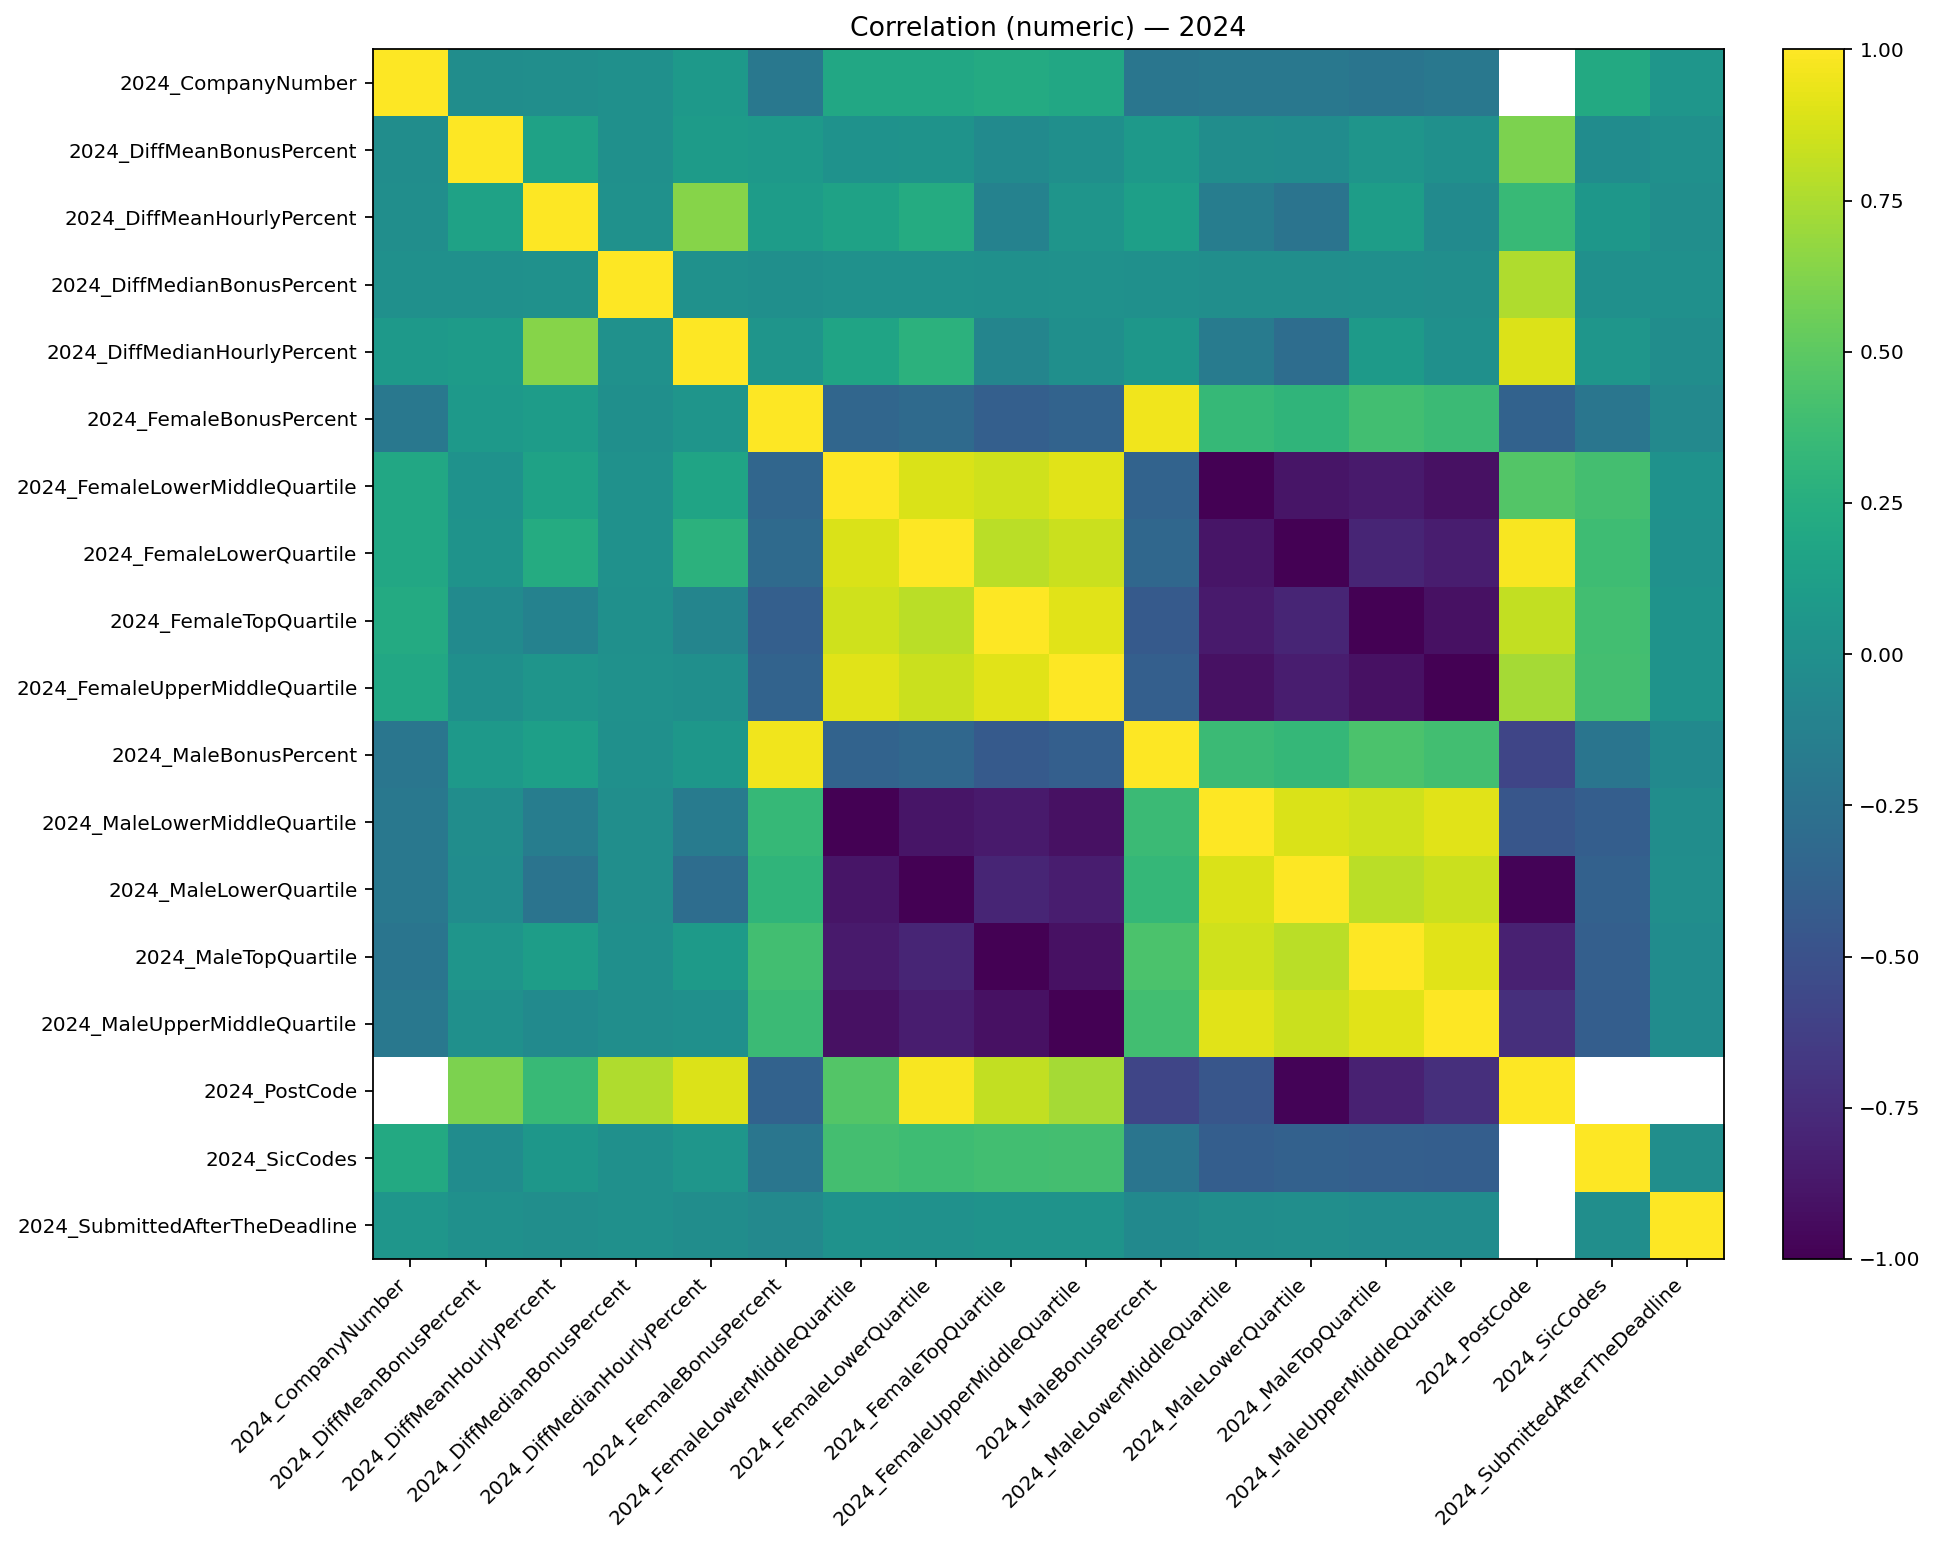

In [13]:
# 12) Correlation matrix (numeric columns) — latest year
prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

if sub.shape[1] >= 2:
    corr = sub.corr(numeric_only=True)
    # 1) Bigger figure + higher DPI
    fig, ax = plt.subplots(figsize=(14,12), dpi=160)

    # 2) Draw heatmap
    im = ax.imshow(corr.values, interpolation="nearest", aspect="auto", vmin=-1, vmax=1)

    # 3) Axis ticks + readable labels
    n = corr.shape[1]
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(corr.columns, fontsize=9)

    # 4) Grid + colorbar
    ax.grid(False)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9)

    # 5) Give labels room
    fig.subplots_adjust(left=0.32, bottom=0.32, right=0.98, top=0.95)
    ax.set_title(f"Correlation (numeric) — {latest_year}", fontsize=12)

    plt.show()
else:
    print("[SKIP] Not enough numeric columns for correlation heatmap.")

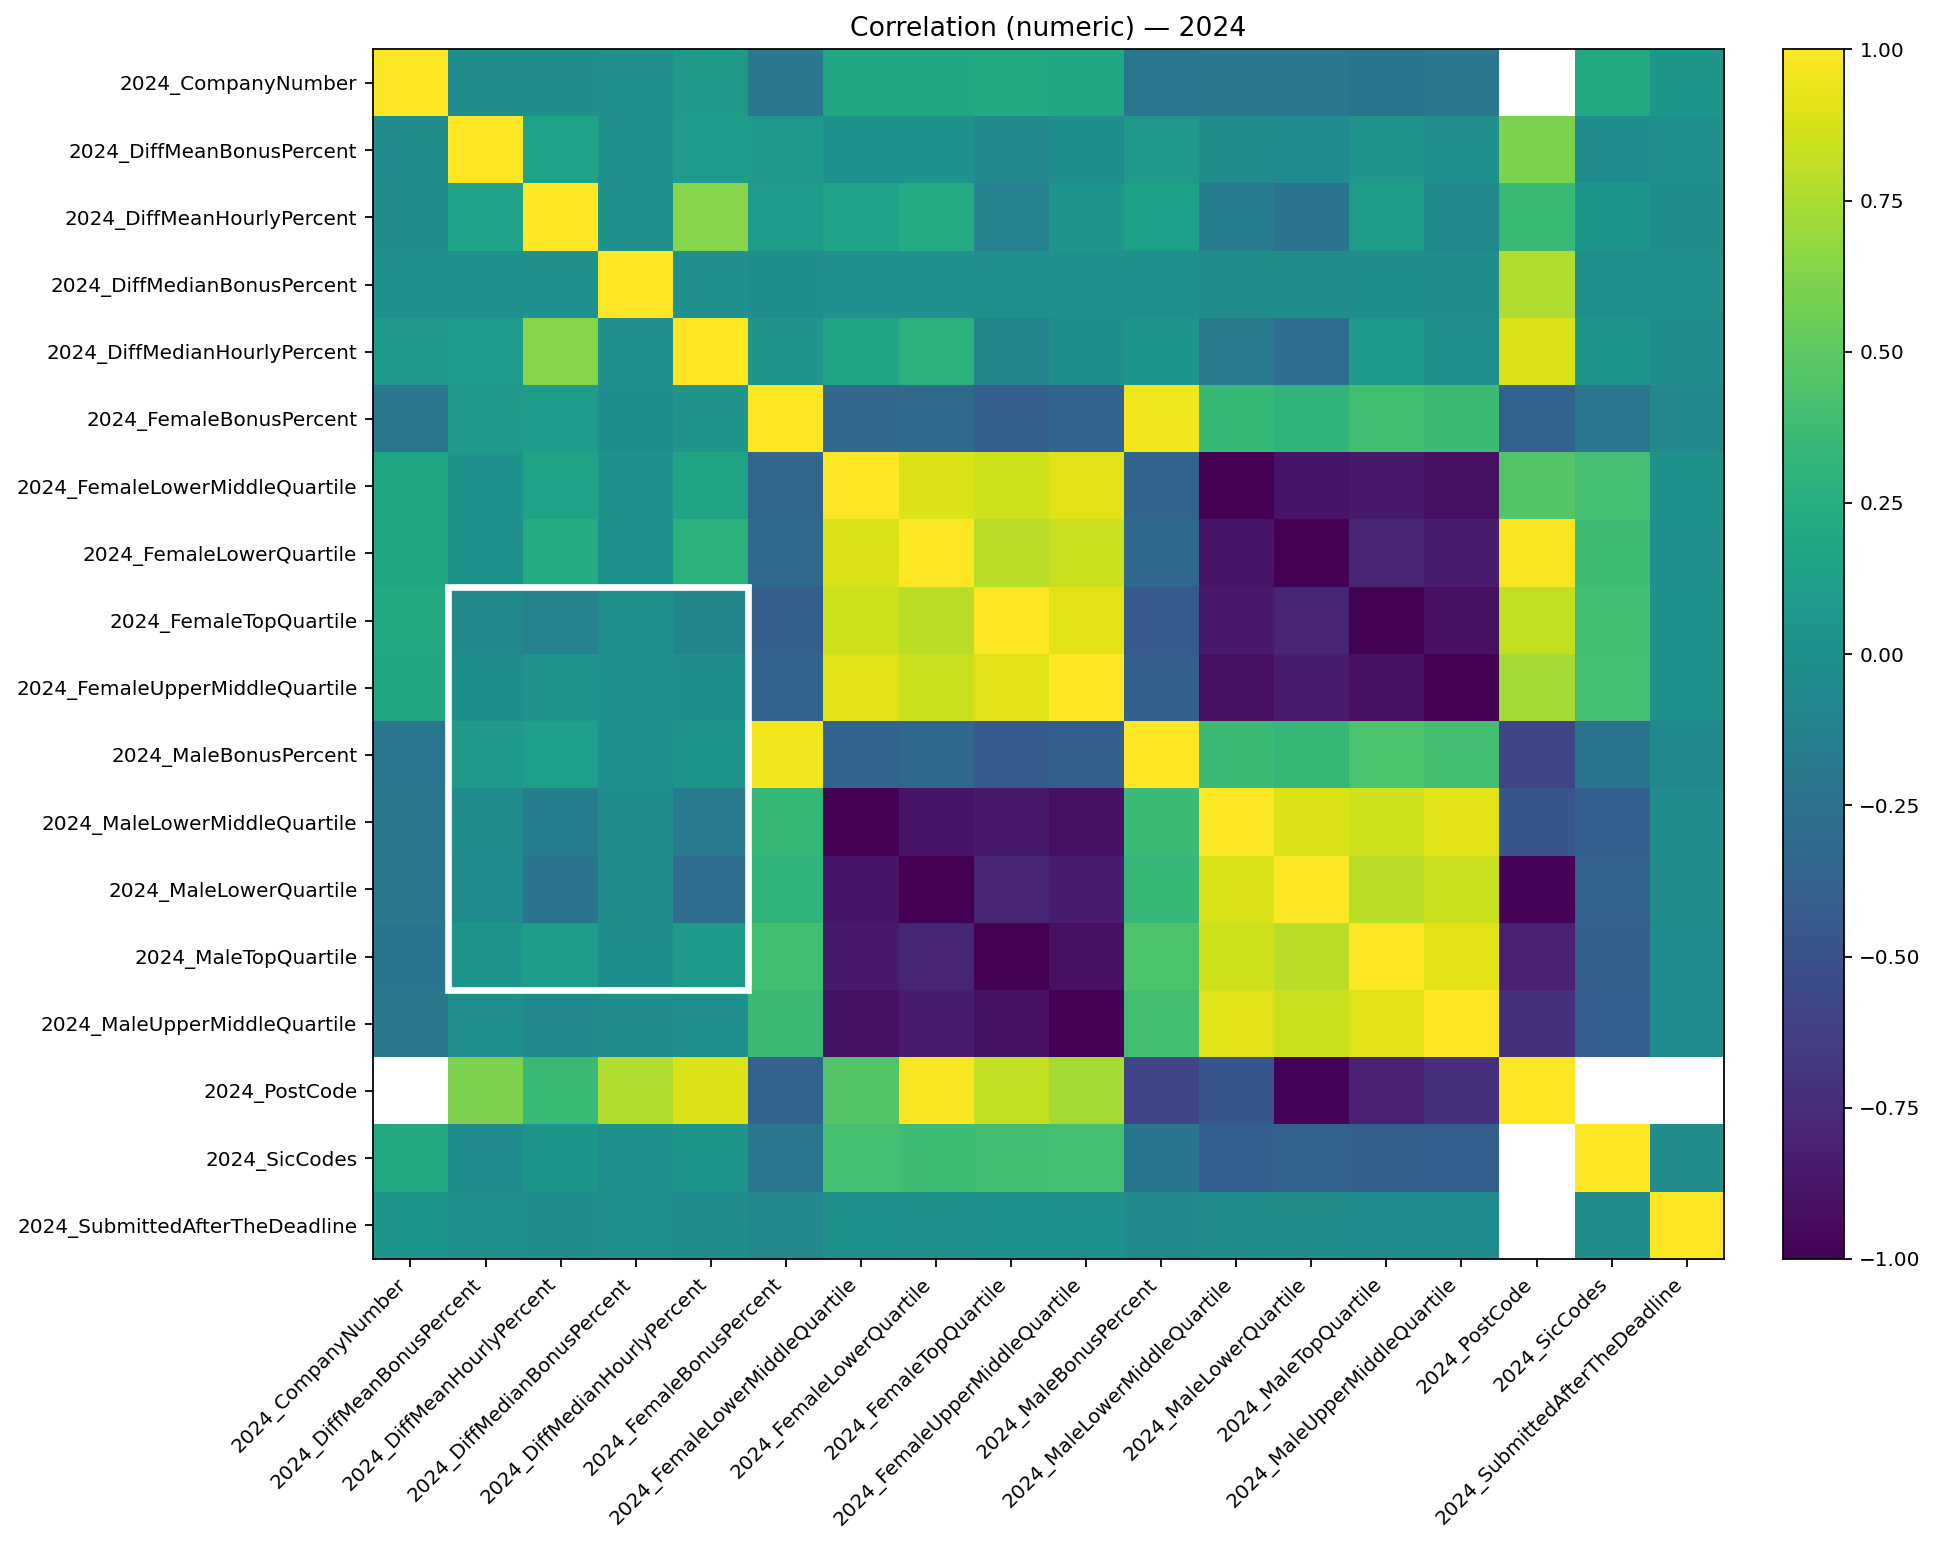

In [14]:
# 12) Correlation matrix (numeric columns) — latest year
prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

if sub.shape[1] >= 2:
    corr = sub.corr(numeric_only=True)

    fig, ax = plt.subplots(figsize=(14, 12), dpi=160)
    im = ax.imshow(corr.values, interpolation="nearest",
                   aspect="auto", vmin=-1, vmax=1)

    n = corr.shape[1]
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(corr.columns, fontsize=9)

    ax.grid(False)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9)

    fig.subplots_adjust(left=0.32, bottom=0.32, right=0.98, top=0.95)
    ax.set_title(f"Correlation (numeric) — {latest_year}", fontsize=12)

    # NEW: outline the focus block
    from matplotlib.patches import Rectangle

    gap_vars = [
        f"{prefix}DiffMeanHourlyPercent",
        f"{prefix}DiffMedianHourlyPercent",
        f"{prefix}DiffMeanBonusPercent",
        f"{prefix}DiffMedianBonusPercent",
    ]
    top_vars = [
        f"{prefix}FemaleTopQuartile",
        f"{prefix}MaleTopQuartile",
    ]

    row_idx = [corr.index.get_loc(v) for v in top_vars if v in corr.index]
    col_idx = [corr.columns.get_loc(v) for v in gap_vars if v in corr.columns]

    if row_idx and col_idx:
        r0, r1 = min(row_idx), max(row_idx)
        c0, c1 = min(col_idx), max(col_idx)

        rect = Rectangle((c0 - 0.5, r0 - 0.5),
                         width=(c1 - c0 + 1),
                         height=(r1 - r0 + 1),
                         fill=False,
                         linewidth=3,
                         edgecolor="white")
        ax.add_patch(rect)

    plt.show()
else:
    print("[SKIP] Not enough numeric columns for correlation heatmap.")


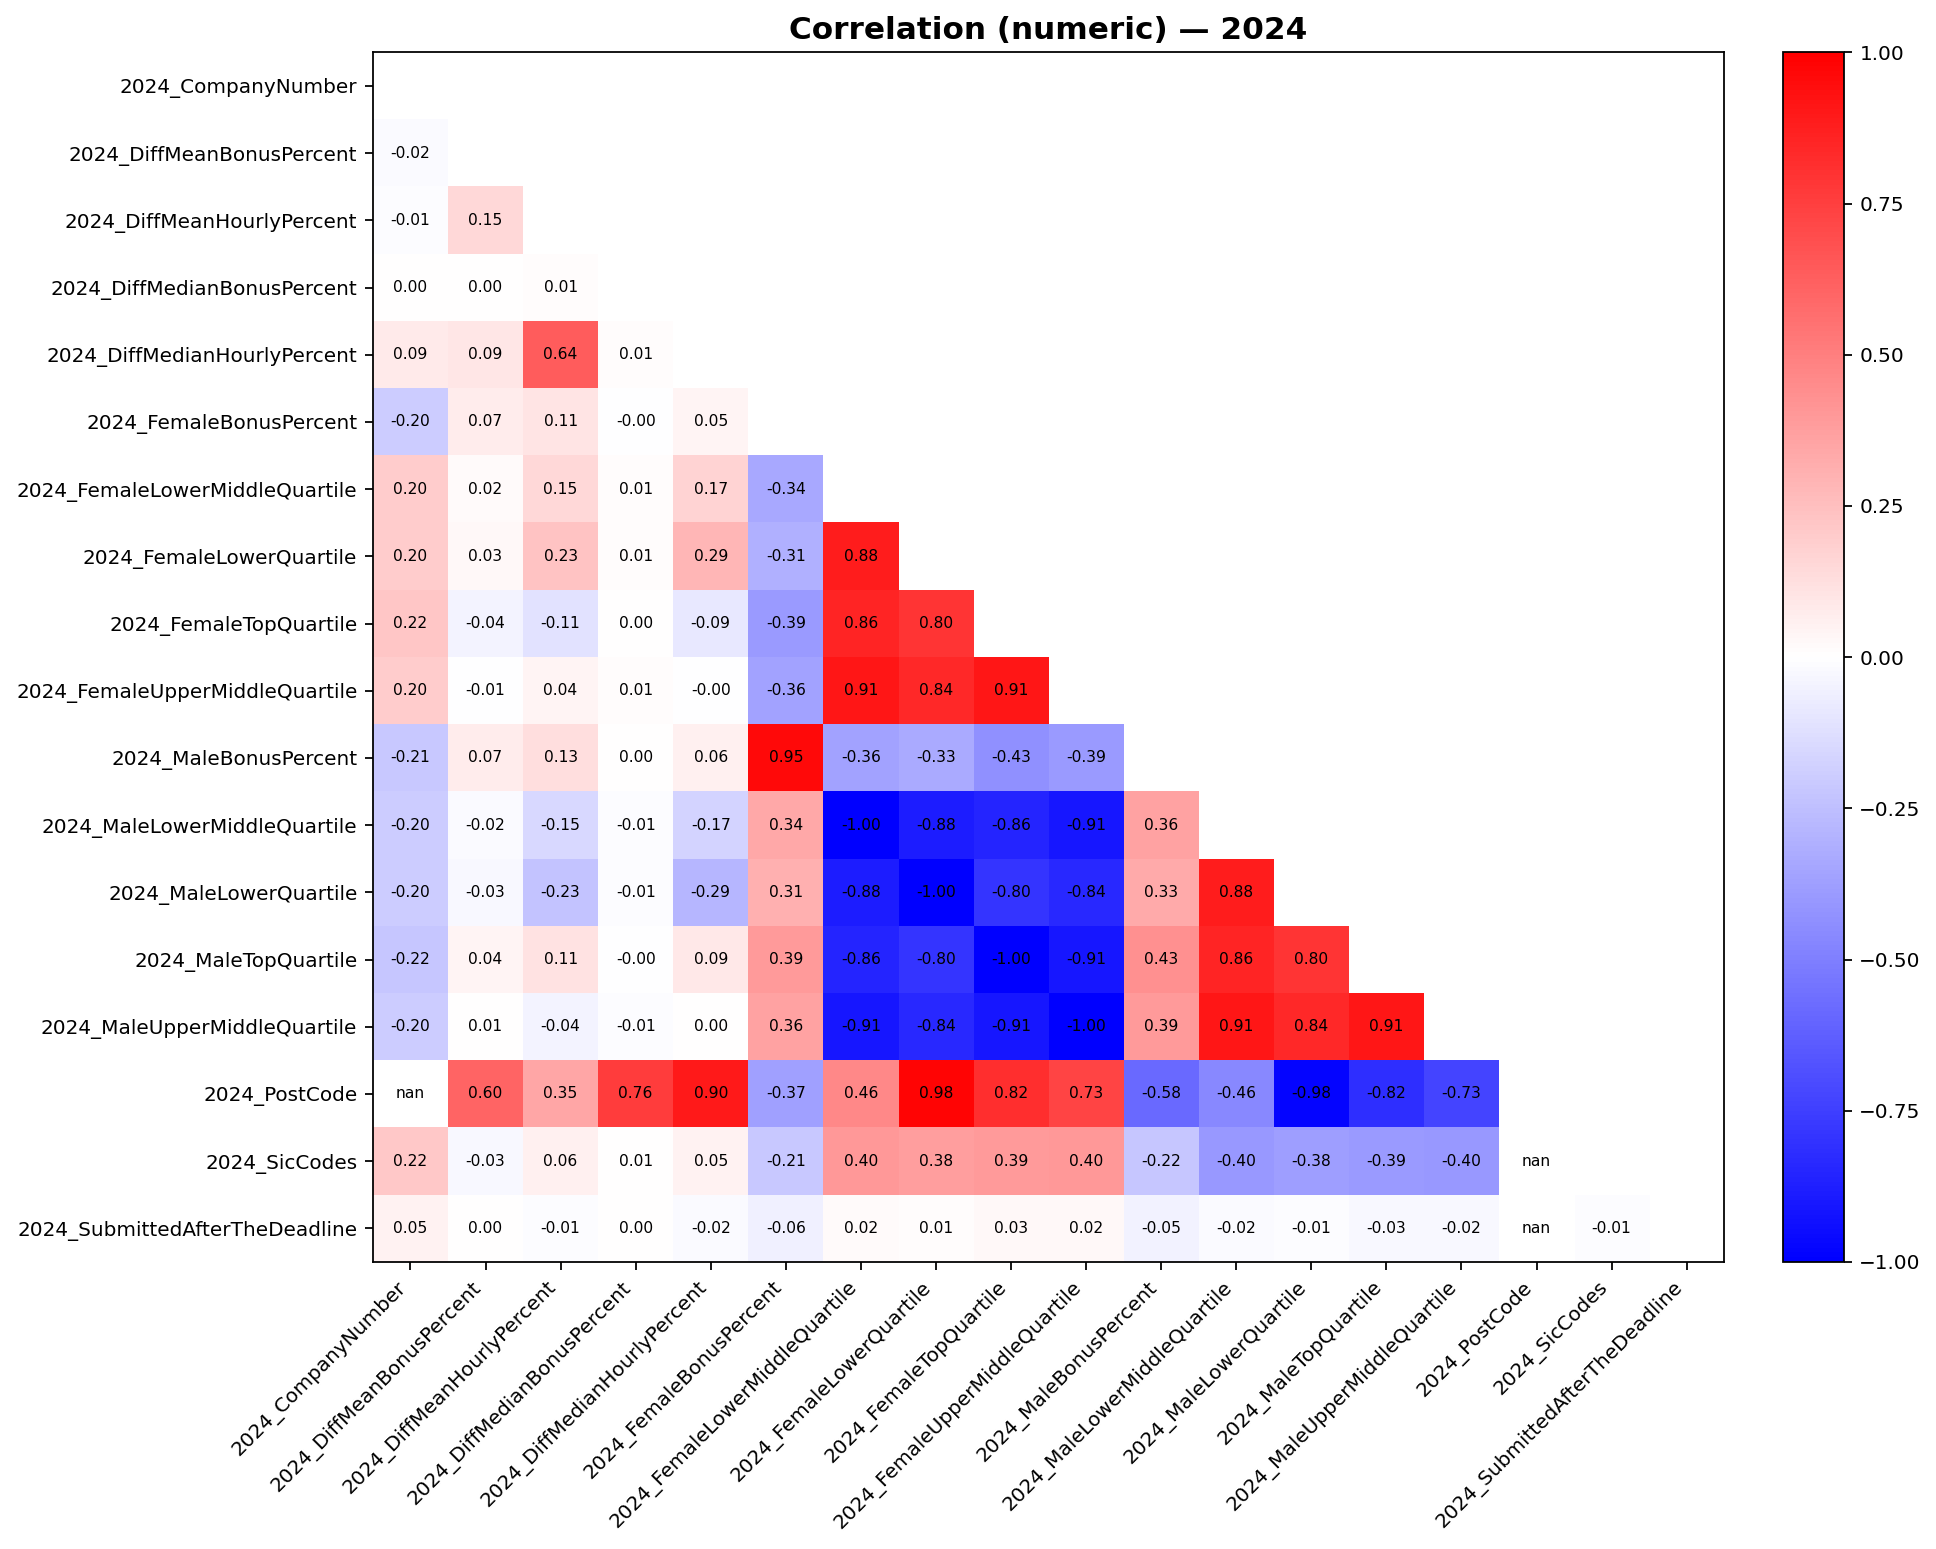

In [15]:
# 12) Correlation matrix (numeric columns) — latest year
prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

if sub.shape[1] >= 2:

    corr = sub.corr(numeric_only=True)

    fig, ax = plt.subplots(figsize=(14, 12), dpi=160)


    # 1) Mask the upper triangle (keep lower triangle)

    mask = np.triu(np.ones_like(corr, dtype=bool))


    # 2) Use a red-white-blue divergent colormap

    cmap = plt.get_cmap("bwr")   # Blue-White-Red

    im = ax.imshow(
        np.ma.array(corr.values, mask=mask),
        interpolation="nearest",
        aspect="auto",
        vmin=-1,
        vmax=1,
        cmap=cmap
    )

    # 3) Tick labels

    n = corr.shape[1]
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(corr.columns, fontsize=9)

    # 4) Add correlation values to the lower triangle

    for i in range(n):
        for j in range(n):
            if i > j:   # only lower triangle
                val = corr.iloc[i, j]
                ax.text(
                    j, i,
                    f"{val:.2f}",
                    ha="center",
                    va="center",
                    fontsize=7,
                    color="black"
                )

    # 5) Colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9)

    # 6) Layout
    fig.subplots_adjust(left=0.32, bottom=0.32, right=0.98, top=0.95)
    ax.set_title(f"Correlation (numeric) — {latest_year}", fontsize=14, fontweight="bold")

    plt.show()

else:
    print("[SKIP] Not enough numeric columns for correlation heatmap.")


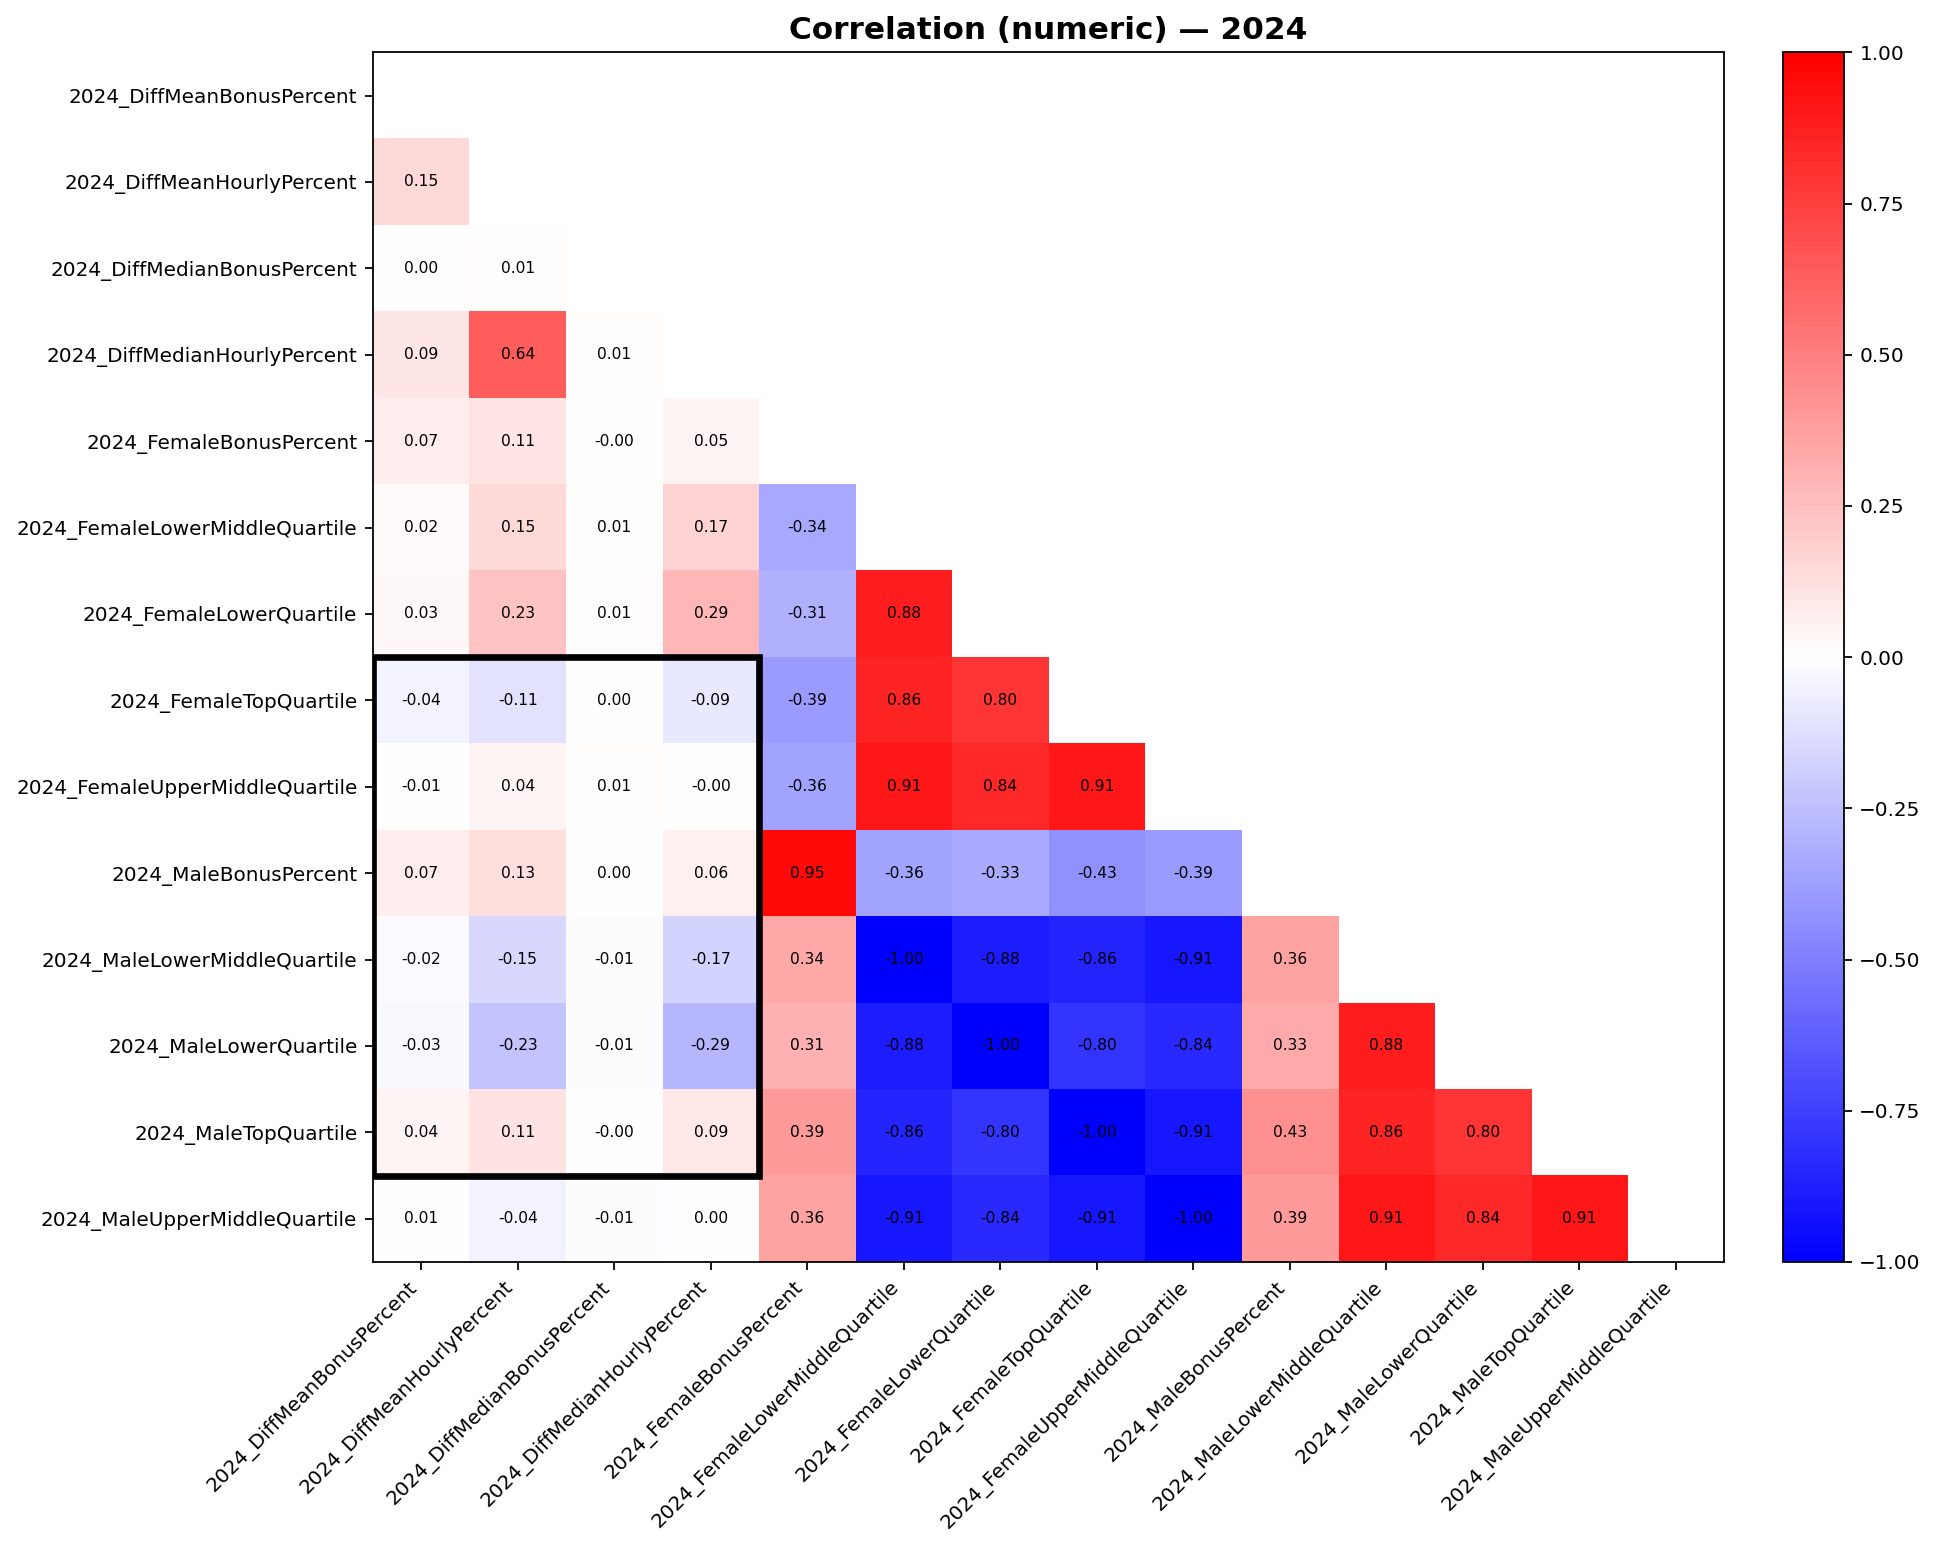

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 12) Correlation matrix (numeric columns) — latest year
prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

# drop admin/meta columns that shouldn't be in a numeric corr
drop_cols = [
    f"{prefix}CompanyNumber",
    f"{prefix}PostCode",
    f"{prefix}SicCodes",
    f"{prefix}SubmittedAfterTheDeadline",
]
sub = sub.drop(columns=[c for c in drop_cols if c in sub.columns], errors="ignore")

if sub.shape[1] >= 2:
    corr = sub.corr(numeric_only=True)

    fig, ax = plt.subplots(figsize=(14, 12), dpi=160)

    #1) Mask upper triangle (keep lower)
    n = corr.shape[1]
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 2) Red–white–blue colormap
    cmap = plt.get_cmap("bwr")

    data = np.ma.array(corr.values, mask=mask)

    im = ax.imshow(
        data,
        interpolation="nearest",
        aspect="auto",
        vmin=-1,
        vmax=1,
        cmap=cmap,
    )

    # 3) Axis ticks + labels
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(corr.columns, fontsize=9)

    # 4) Add correlation numbers on lower triangle
    for i in range(n):
        for j in range(n):
            if i > j and not np.isnan(corr.values[i, j]):
                ax.text(
                    j, i,
                    f"{corr.values[i, j]:.2f}",
                    ha="center",
                    va="center",
                    fontsize=7,
                    color="black",
                )

    # 5) Colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9)

    # 6) Outline the “interesting” block:
    #       pay/bonus gaps vs top-quartile representation
    gap_vars = [
        f"{prefix}DiffMeanHourlyPercent",
        f"{prefix}DiffMedianHourlyPercent",
        f"{prefix}DiffMeanBonusPercent",
        f"{prefix}DiffMedianBonusPercent",
    ]
    top_vars = [
        f"{prefix}FemaleTopQuartile",
        f"{prefix}MaleTopQuartile",
        # (optional) uncomment if you want upper-middle too:
        # f"{prefix}FemaleUpperMiddleQuartile",
        # f"{prefix}MaleUpperMiddleQuartile",
    ]

    # Keep only those that actually exist in this corr
    gap_idx = [corr.columns.get_loc(v) for v in gap_vars if v in corr.columns]
    top_idx = [corr.index.get_loc(v) for v in top_vars if v in corr.index]

    if gap_idx and top_idx:
        c0, c1 = min(gap_idx), max(gap_idx)
        r0, r1 = min(top_idx), max(top_idx)

        # Rectangle covers columns [c0..c1], rows [r0..r1]
        rect = Rectangle(
            (c0 - 0.5, r0 - 0.5),            # bottom-left (x, y)
            width=(c1 - c0 + 1),
            height=(r1 - r0 + 1),
            fill=False,
            linewidth=3,
            edgecolor="black",
        )
        ax.add_patch(rect)

    # 7) Layout + title
    fig.subplots_adjust(left=0.32, bottom=0.32, right=0.98, top=0.95)
    ax.set_title(f"Correlation (numeric) — {latest_year}", fontsize=14, fontweight="bold")

    plt.show()
else:
    print("[SKIP] Not enough numeric columns for correlation heatmap.")


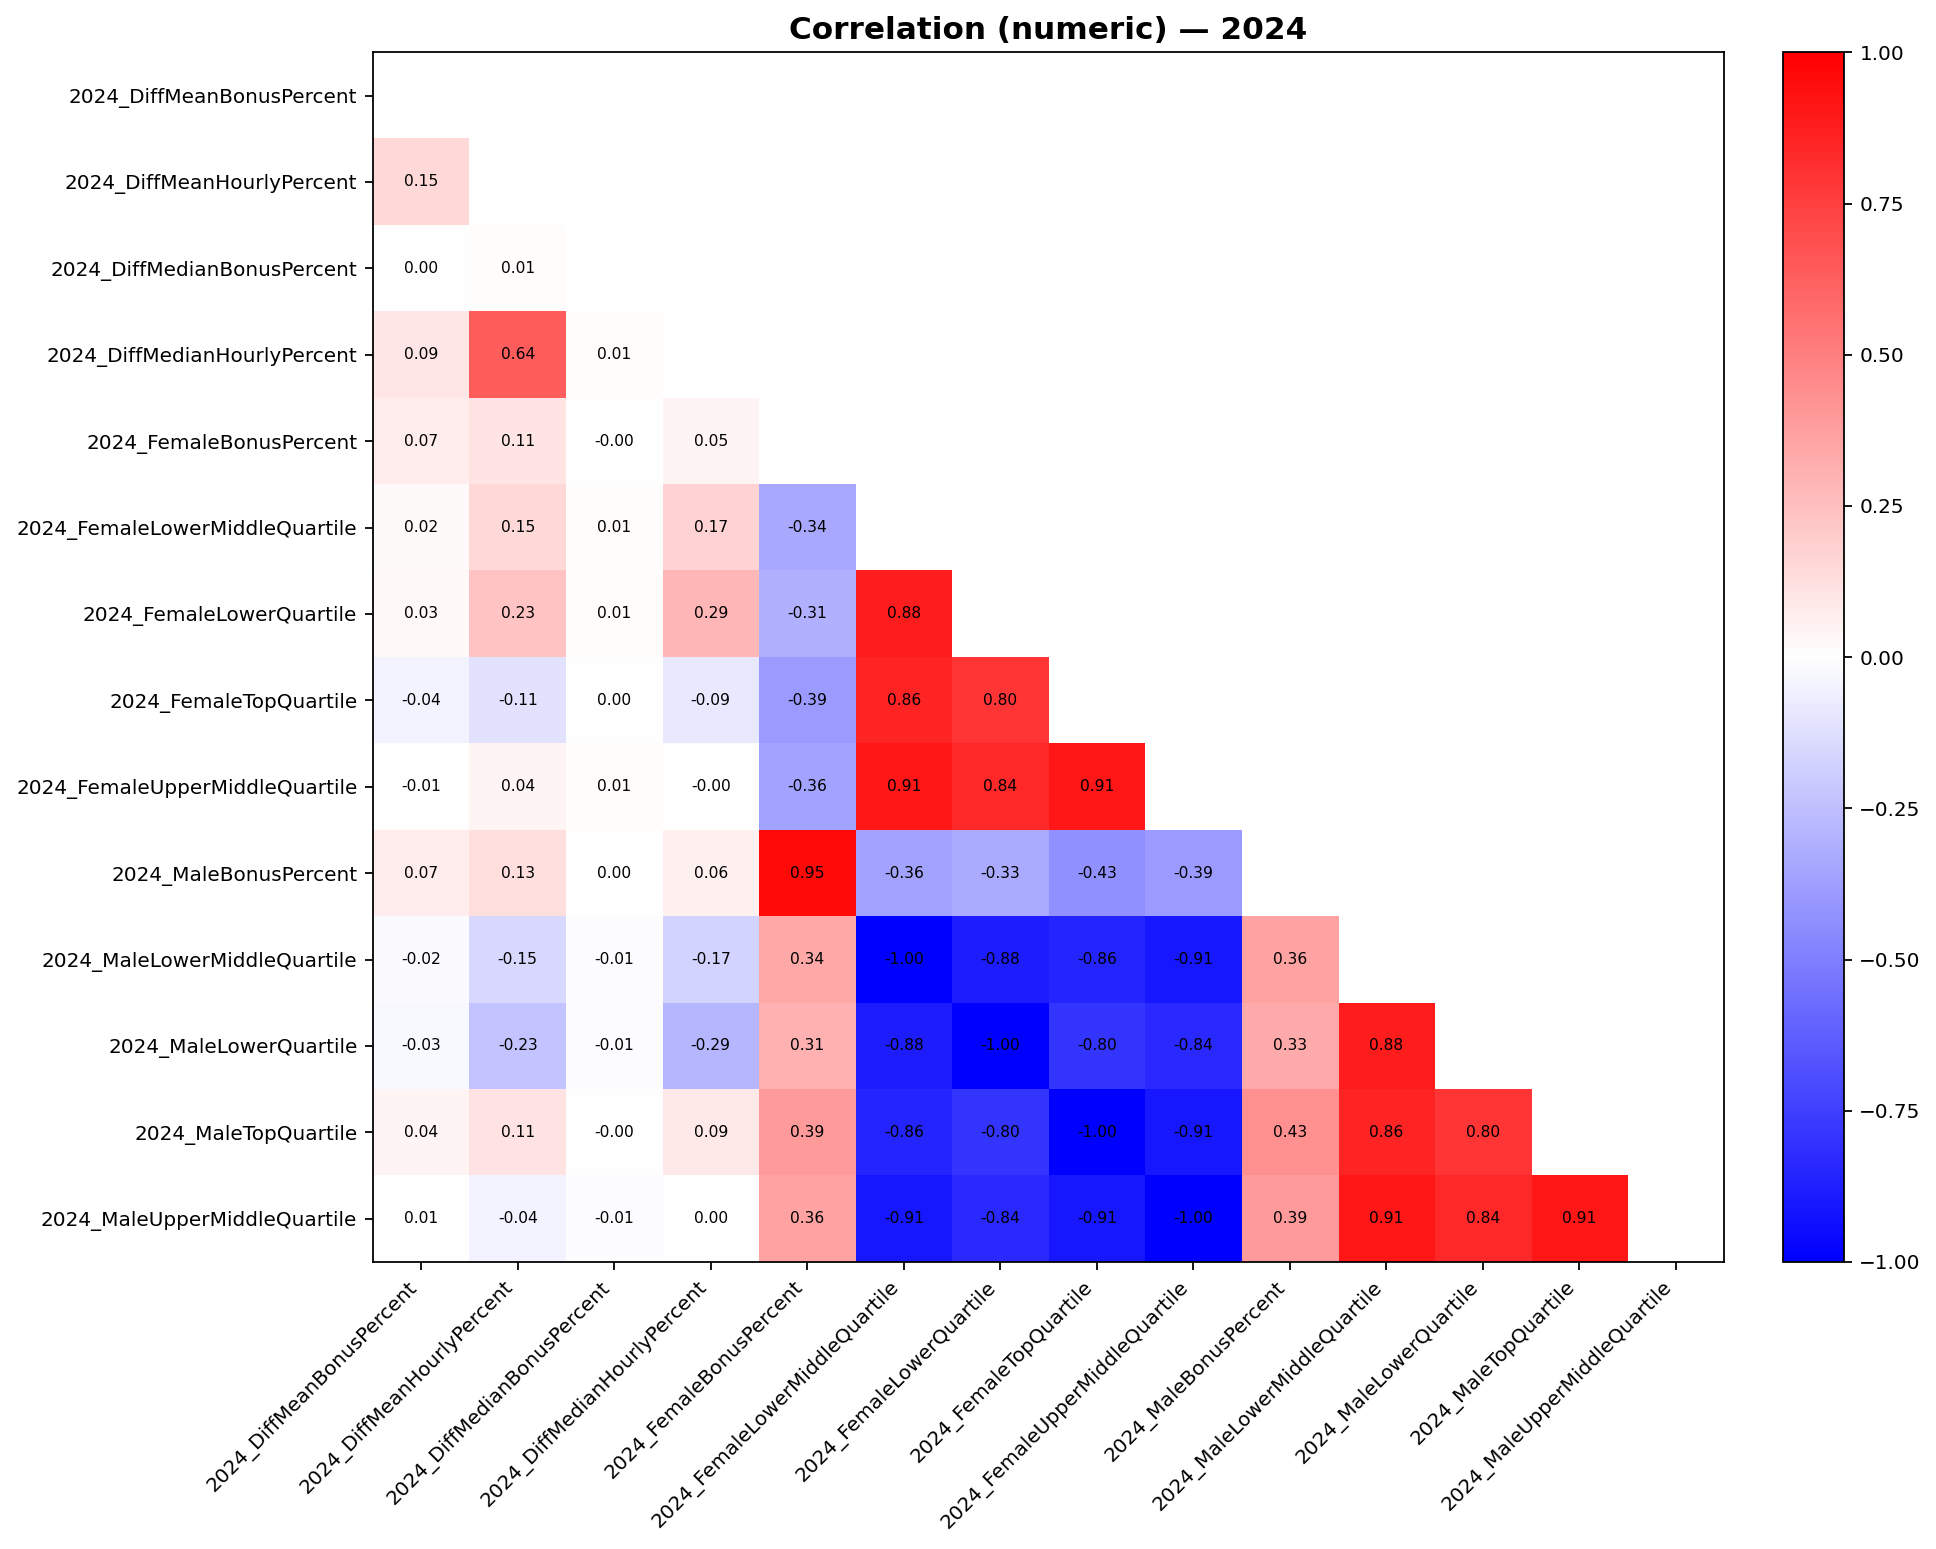

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 12) Correlation matrix (numeric columns) — latest year
prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

# drop admin/meta columns that shouldn't be in a numeric corr
drop_cols = [
    f"{prefix}CompanyNumber",
    f"{prefix}PostCode",
    f"{prefix}SicCodes",
    f"{prefix}SubmittedAfterTheDeadline",
]
sub = sub.drop(columns=[c for c in drop_cols if c in sub.columns], errors="ignore")

if sub.shape[1] >= 2:
    corr = sub.corr(numeric_only=True)

    fig, ax = plt.subplots(figsize=(14, 12), dpi=160)

    # 1) Mask upper triangle (keep lower)
    n = corr.shape[1]
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 2) Red–white–blue colormap
    cmap = plt.get_cmap("bwr")

    data = np.ma.array(corr.values, mask=mask)

    im = ax.imshow(
        data,
        interpolation="nearest",
        aspect="auto",
        vmin=-1,
        vmax=1,
        cmap=cmap,
    )

    # 3) Axis ticks + labels
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
    ax.set_yticklabels(corr.columns, fontsize=9)

    # 4) Add correlation numbers on lower triangle
    for i in range(n):
        for j in range(n):
            if i > j and not np.isnan(corr.values[i, j]):
                ax.text(
                    j, i,
                    f"{corr.values[i, j]:.2f}",
                    ha="center",
                    va="center",
                    fontsize=7,
                    color="black",
                )

    # 5) Colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=9)

    # ❌ REMOVED SECTION: highlight box around interesting variables

    # 7) Layout + title
    fig.subplots_adjust(left=0.32, bottom=0.32, right=0.98, top=0.95)
    ax.set_title(f"Correlation (numeric) — {latest_year}", fontsize=14, fontweight="bold")

    plt.show()
else:
    print("[SKIP] Not enough numeric columns for correlation heatmap.")



=== FULL CORRELATION MATRIX ===
                                2024_DiffMeanBonusPercent  2024_DiffMeanHourlyPercent  2024_DiffMedianBonusPercent  2024_DiffMedianHourlyPercent  \
2024_DiffMeanBonusPercent                            1.00                        0.15                         0.00                          0.09   
2024_DiffMeanHourlyPercent                           0.15                        1.00                         0.01                          0.64   
2024_DiffMedianBonusPercent                          0.00                        0.01                         1.00                          0.01   
2024_DiffMedianHourlyPercent                         0.09                        0.64                         0.01                          1.00   
2024_FemaleBonusPercent                              0.07                        0.11                        -0.00                          0.05   
2024_FemaleLowerMiddleQuartile                       0.02                      

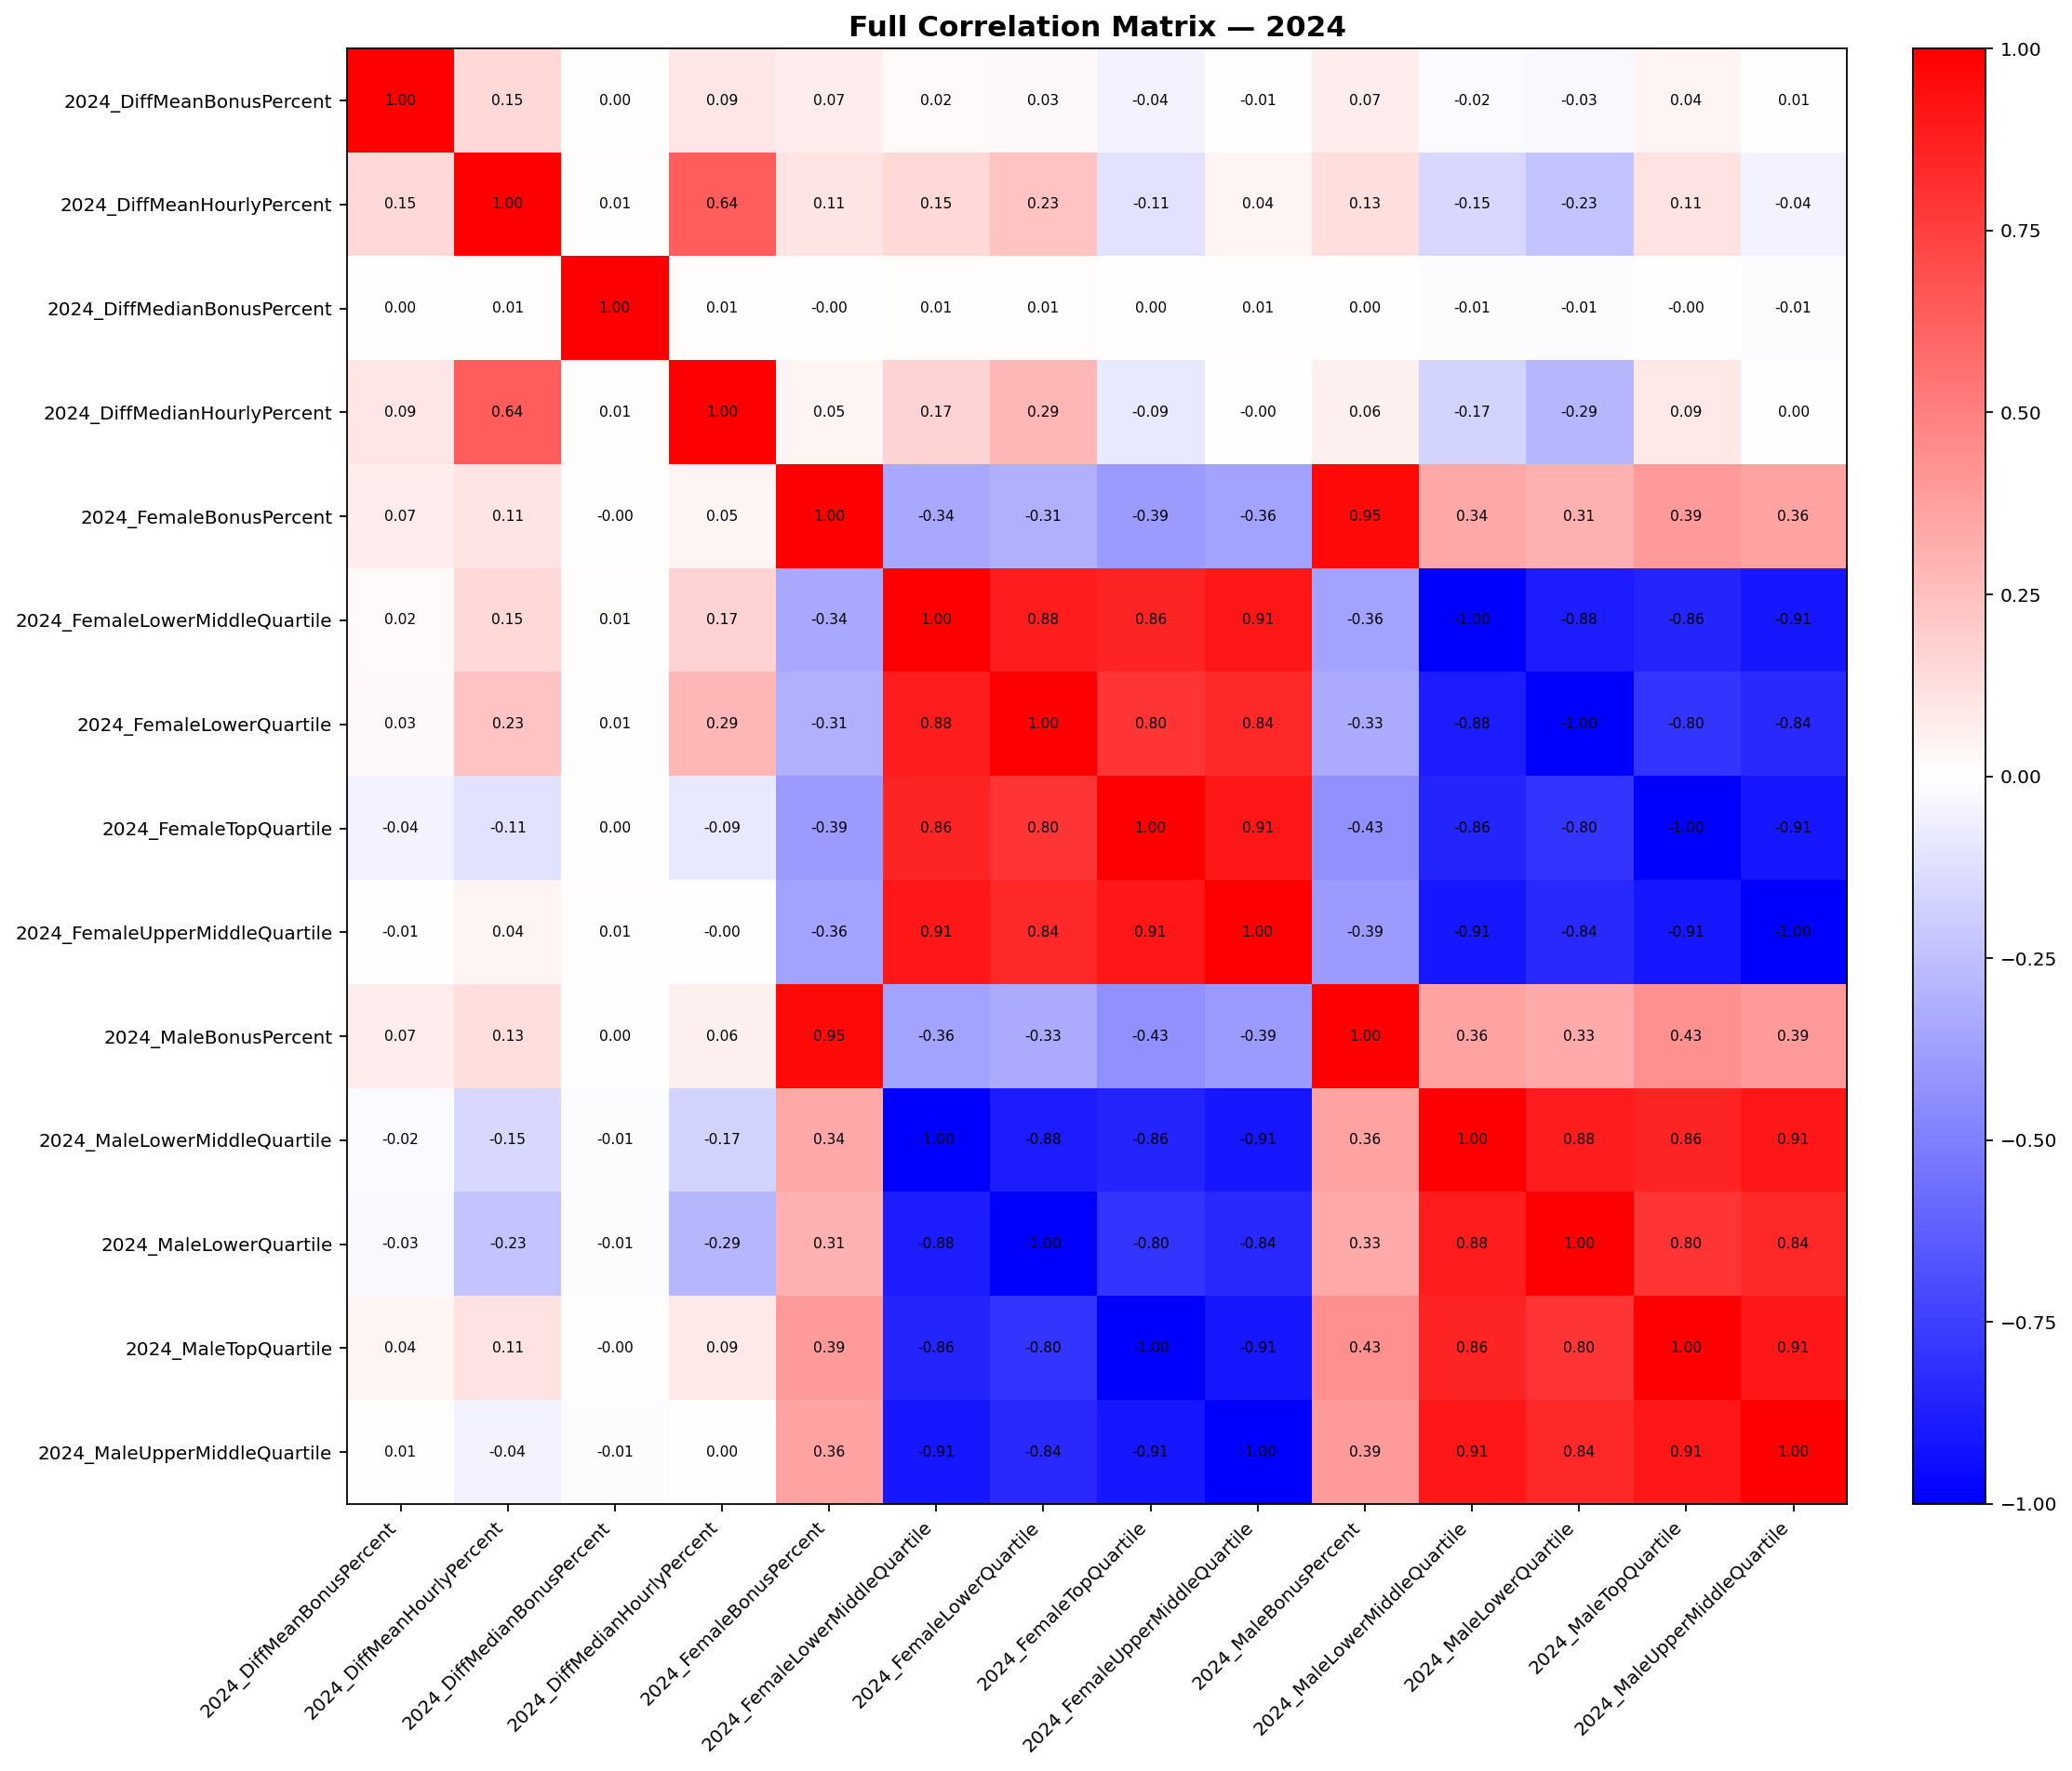

In [19]:
# === FULL CORRELATION MATRIX (NO MASK) ===

prefix = f"{latest_year}_"
num_cols = [c for c in df.columns if c.startswith(prefix)]
sub = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Drop meta columns
drop_cols = [
    f"{prefix}CompanyNumber",
    f"{prefix}PostCode",
    f"{prefix}SicCodes",
    f"{prefix}SubmittedAfterTheDeadline",
]
sub = sub.drop(columns=[c for c in drop_cols if c in sub.columns], errors="ignore")
sub = sub.loc[:, sub.columns[sub.notna().sum() > 0]]

corr = sub.corr()

# --- Print full matrix ---
print("\n=== FULL CORRELATION MATRIX ===")
print(corr.round(2))

# --- Plot full heatmap ---
fig, ax = plt.subplots(figsize=(14, 12), dpi=160)

im = ax.imshow(
    corr,
    interpolation="nearest",
    aspect="auto",
    vmin=-1,
    vmax=1,
    cmap="bwr"
)

# ticks
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right", fontsize=9)
ax.set_yticklabels(corr.columns, fontsize=9)

# numbers for every cell (full matrix)
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(
            j, i,
            f"{corr.values[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=7,
            color="black"
        )

# colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=9)

ax.set_title(f"Full Correlation Matrix — {latest_year}", fontsize=14, fontweight="bold")
fig.tight_layout()
plt.show()
